In [1]:
import pip
pip.main(["install","xgboost"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [79]:
import pip
pip.main(["install","imblearn"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [1]:
from imblearn.over_sampling import SMOTE

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,ExtraTreesClassifier,ExtraTreesRegressor
from xgboost import XGBRegressor,XGBClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor #KNN
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,mean_squared_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree,export_text
import imblearn

%matplotlib inline

### Data Preprocessing

In [3]:
# importing dataset
dataset = pd.read_csv("diabetic_data.csv")

In [4]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
# dropping unwanted columns
dataset = dataset.drop(['encounter_id','patient_nbr','weight','payer_code','medical_specialty','diag_1','diag_2','diag_3'],axis=1)

In [6]:
dataset.duplicated().sum()

6

In [7]:
# dropping duplicate raws
dataset.drop_duplicates(inplace=True)
dataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101760 entries, 0 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101760 non-null  object
 1   gender                    101760 non-null  object
 2   age                       101760 non-null  object
 3   admission_type_id         101760 non-null  int64 
 4   discharge_disposition_id  101760 non-null  int64 
 5   admission_source_id       101760 non-null  int64 
 6   time_in_hospital          101760 non-null  int64 
 7   num_lab_procedures        101760 non-null  int64 
 8   num_procedures            101760 non-null  int64 
 9   num_medications           101760 non-null  int64 
 10  number_outpatient         101760 non-null  int64 
 11  number_emergency          101760 non-null  int64 
 12  number_inpatient          101760 non-null  int64 
 13  number_diagnoses          101760 non-null  int64 
 14  max_

In [10]:
# replacing values
dataset["race"].replace({"?":"Unknown"}, inplace=True)

In [11]:
dataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
# removing rows that contains 'Unknown/Invalid' for gender column
dataset = dataset[dataset.gender != 'Unknown/Invalid']

In [13]:
dataset.gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
dataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [15]:
dataset.metformin.unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [16]:
# data encoding

dataset['race'] = dataset['race'].map({'Caucasian':0, 'AfricanAmerican':1, 'Asian':2, 'Hispanic':3, 'Other':4, 'Unknown':5})
dataset['gender'] = dataset['gender'].map({'Male':1,'Female':0})
dataset['age'] = dataset['age'].map({'[0-10)':1,'[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5, '[50-60)':6, 
                                    '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10})


In [17]:
dataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,1,6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,0,0,2,1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,1,0,3,1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,0,1,4,1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,0,1,5,1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101757 entries, 0 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101757 non-null  int64 
 1   gender                    101757 non-null  int64 
 2   age                       101757 non-null  int64 
 3   admission_type_id         101757 non-null  int64 
 4   discharge_disposition_id  101757 non-null  int64 
 5   admission_source_id       101757 non-null  int64 
 6   time_in_hospital          101757 non-null  int64 
 7   num_lab_procedures        101757 non-null  int64 
 8   num_procedures            101757 non-null  int64 
 9   num_medications           101757 non-null  int64 
 10  number_outpatient         101757 non-null  int64 
 11  number_emergency          101757 non-null  int64 
 12  number_inpatient          101757 non-null  int64 
 13  number_diagnoses          101757 non-null  int64 
 14  max_

In [19]:
# data encoding (col 16-38)

for col in dataset.iloc[:,16:39]:
    dataset[col] = dataset[col].map({'No':0, 'Steady':1, 'Up':2, 'Down':3})

In [20]:
dataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,1,6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,No,No,NO
1,0,0,2,1,1,7,3,59,0,18,...,0,2,0,0,0,0,0,Ch,Yes,>30
2,1,0,3,1,1,7,2,11,5,13,...,0,0,0,0,0,0,0,No,Yes,NO
3,0,1,4,1,1,7,2,44,1,16,...,0,2,0,0,0,0,0,Ch,Yes,NO
4,0,1,5,1,1,7,1,51,0,8,...,0,1,0,0,0,0,0,Ch,Yes,NO


In [21]:
dataset.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [22]:
# data encoding
dataset['change'] = dataset['change'].map({'No':0, 'Ch':1})
dataset['diabetesMed'] = dataset['diabetesMed'].map({'No':0, 'Yes':1})
dataset['readmitted'] = dataset['readmitted'].map({'NO':0, '>30':1, '<30':2})

In [23]:
dataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,1,6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,1,7,3,59,0,18,...,0,2,0,0,0,0,0,1,1,1
2,1,0,3,1,1,7,2,11,5,13,...,0,0,0,0,0,0,0,0,1,0
3,0,1,4,1,1,7,2,44,1,16,...,0,2,0,0,0,0,0,1,1,0
4,0,1,5,1,1,7,1,51,0,8,...,0,1,0,0,0,0,0,1,1,0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101757 entries, 0 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101757 non-null  int64 
 1   gender                    101757 non-null  int64 
 2   age                       101757 non-null  int64 
 3   admission_type_id         101757 non-null  int64 
 4   discharge_disposition_id  101757 non-null  int64 
 5   admission_source_id       101757 non-null  int64 
 6   time_in_hospital          101757 non-null  int64 
 7   num_lab_procedures        101757 non-null  int64 
 8   num_procedures            101757 non-null  int64 
 9   num_medications           101757 non-null  int64 
 10  number_outpatient         101757 non-null  int64 
 11  number_emergency          101757 non-null  int64 
 12  number_inpatient          101757 non-null  int64 
 13  number_diagnoses          101757 non-null  int64 
 14  max_

In [25]:
dataset.A1Cresult.unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [26]:
dataset['max_glu_serum'] = dataset['max_glu_serum'].map({'None':0, '>300':1, 'Norm':2, '>200':3})
dataset['A1Cresult'] = dataset['A1Cresult'].map({'None':0, '>7':1, '>8':2, 'Norm':3})

In [27]:
dataset['A1Cresult'].head()

0    0
1    0
2    0
3    0
4    0
Name: A1Cresult, dtype: int64

In [28]:
dataset.A1Cresult.unique()

array([0, 1, 2, 3], dtype=int64)

In [29]:
dataset['A1Cresult'].head(30)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
Name: A1Cresult, dtype: int64

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101757 entries, 0 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101757 non-null  int64
 1   gender                    101757 non-null  int64
 2   age                       101757 non-null  int64
 3   admission_type_id         101757 non-null  int64
 4   discharge_disposition_id  101757 non-null  int64
 5   admission_source_id       101757 non-null  int64
 6   time_in_hospital          101757 non-null  int64
 7   num_lab_procedures        101757 non-null  int64
 8   num_procedures            101757 non-null  int64
 9   num_medications           101757 non-null  int64
 10  number_outpatient         101757 non-null  int64
 11  number_emergency          101757 non-null  int64
 12  number_inpatient          101757 non-null  int64
 13  number_diagnoses          101757 non-null  int64
 14  max_glu_serum       

### Dealing with Outliers

In [31]:
# removing outliers
boxplot=df.boxplot(column=["race","Sepal.Width","rosiglitazone","glimepiride-pioglitazone"]) # randomly checking boxplot

In [32]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

race                         1.0
gender                       1.0
age                          2.0
admission_type_id            2.0
discharge_disposition_id     3.0
admission_source_id          6.0
time_in_hospital             4.0
num_lab_procedures          26.0
num_procedures               2.0
num_medications             10.0
number_outpatient            0.0
number_emergency             0.0
number_inpatient             1.0
number_diagnoses             3.0
max_glu_serum                0.0
A1Cresult                    0.0
metformin                    0.0
repaglinide                  0.0
nateglinide                  0.0
chlorpropamide               0.0
glimepiride                  0.0
acetohexamide                0.0
glipizide                    0.0
glyburide                    0.0
tolbutamide                  0.0
pioglitazone                 0.0
rosiglitazone                0.0
acarbose                     0.0
miglitol                     0.0
troglitazone                 0.0
tolazamide

In [33]:
(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
out_rows=((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1) 
out_rows

0          True
1          True
2          True
3         False
4          True
          ...  
101761     True
101762    False
101763     True
101764     True
101765     True
Length: 101757, dtype: bool

In [35]:
df_out=dataset[~out_rows]
df_out.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
3,0,1,4,1,1,7,2,44,1,16,...,0,2,0,0,0,0,0,1,1,0
10,1,0,5,1,1,7,9,47,2,17,...,0,1,0,0,0,0,0,0,1,1
13,0,1,9,1,6,7,10,55,1,31,...,0,1,0,0,0,0,0,0,1,0
14,1,0,7,3,1,2,1,49,5,2,...,0,1,0,0,0,0,0,0,1,1
15,1,1,7,1,3,7,12,75,5,13,...,0,2,0,0,0,0,0,1,1,0


In [36]:
print(len(dataset),len(df_out))

101757 9030


In [37]:
dataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,1,6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,1,7,3,59,0,18,...,0,2,0,0,0,0,0,1,1,1
2,1,0,3,1,1,7,2,11,5,13,...,0,0,0,0,0,0,0,0,1,0
3,0,1,4,1,1,7,2,44,1,16,...,0,2,0,0,0,0,0,1,1,0
4,0,1,5,1,1,7,1,51,0,8,...,0,1,0,0,0,0,0,1,1,0


# Splitting

In [61]:
# Your code goes here
x = dataset.drop('readmitted', axis=1).values# Input features (attributes)
y = dataset['readmitted'].values # Target vector
print('X shape: {}'.format(np.shape(x)))
print('y shape: {}'.format(np.shape(y)))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X shape: (101757, 41)
y shape: (101757,)


In [63]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

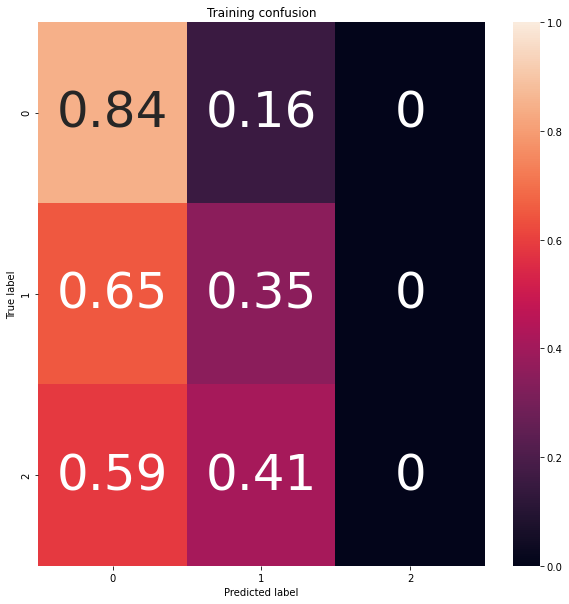

In [64]:
y_pred = dt.predict(x_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [65]:
y_pred,confusion_matrix(y_train, y_pred)

(array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([[32389,  5983,     0],
        [16244,  8668,     0],
        [ 4678,  3267,     0]], dtype=int64))

In [66]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)


The True Positive rate / Recall per class is:  [0.84407902 0.34794477 0.        ]
The Precision per class is:  [0.60754816 0.48375935        nan]
The False Alarm rate per class is:  [0.63675929 0.19971069 0.        ]
The Miss Rate rate per class is:  [0.15592098 0.65205523 1.        ]
The Classification error of each class is [0.37772536 0.35791602 0.11154165]
The Accuracy of each class is [0.62227464 0.64208398 0.88845835]

The average Recall is:  0.5960118907619765
The average Precision is:  nan
The average False Alarm is:  0.41823498981874657
The average Miss Rate rate is:  0.9039881092380235
The average Classification error is 0.4235915146920496
The average Accuracy is 1.0764084853079505


<ipython-input-66-b941d9f7c8e5>:13: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)


# Random Forest

In [67]:
rfcl = RandomForestClassifier()
rfcl.fit(x_train, y_train)
prediction_test = rfcl.predict(x_test)

In [68]:
y_pred=rfcl.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred)

0.5755372117400419

In [70]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(x_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(x_test, y_test))

Training Accuracy is:  0.5764084853079504
Testing Accuracy is:  0.5759302935010482


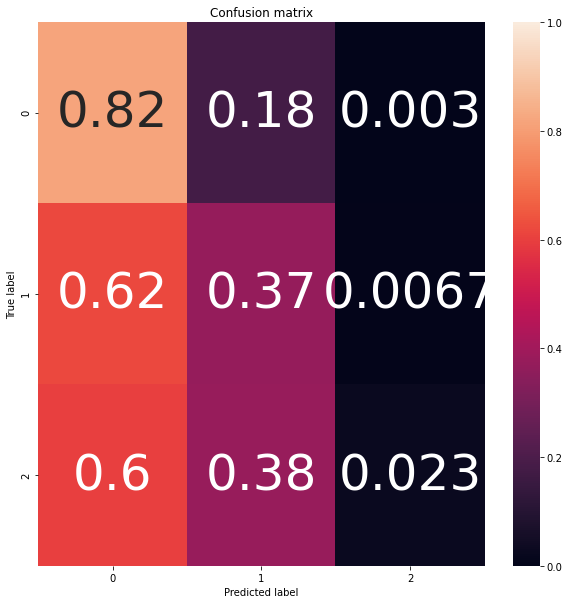

In [71]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_norm, classes=rfcl.classes_)

In [72]:
dataset.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

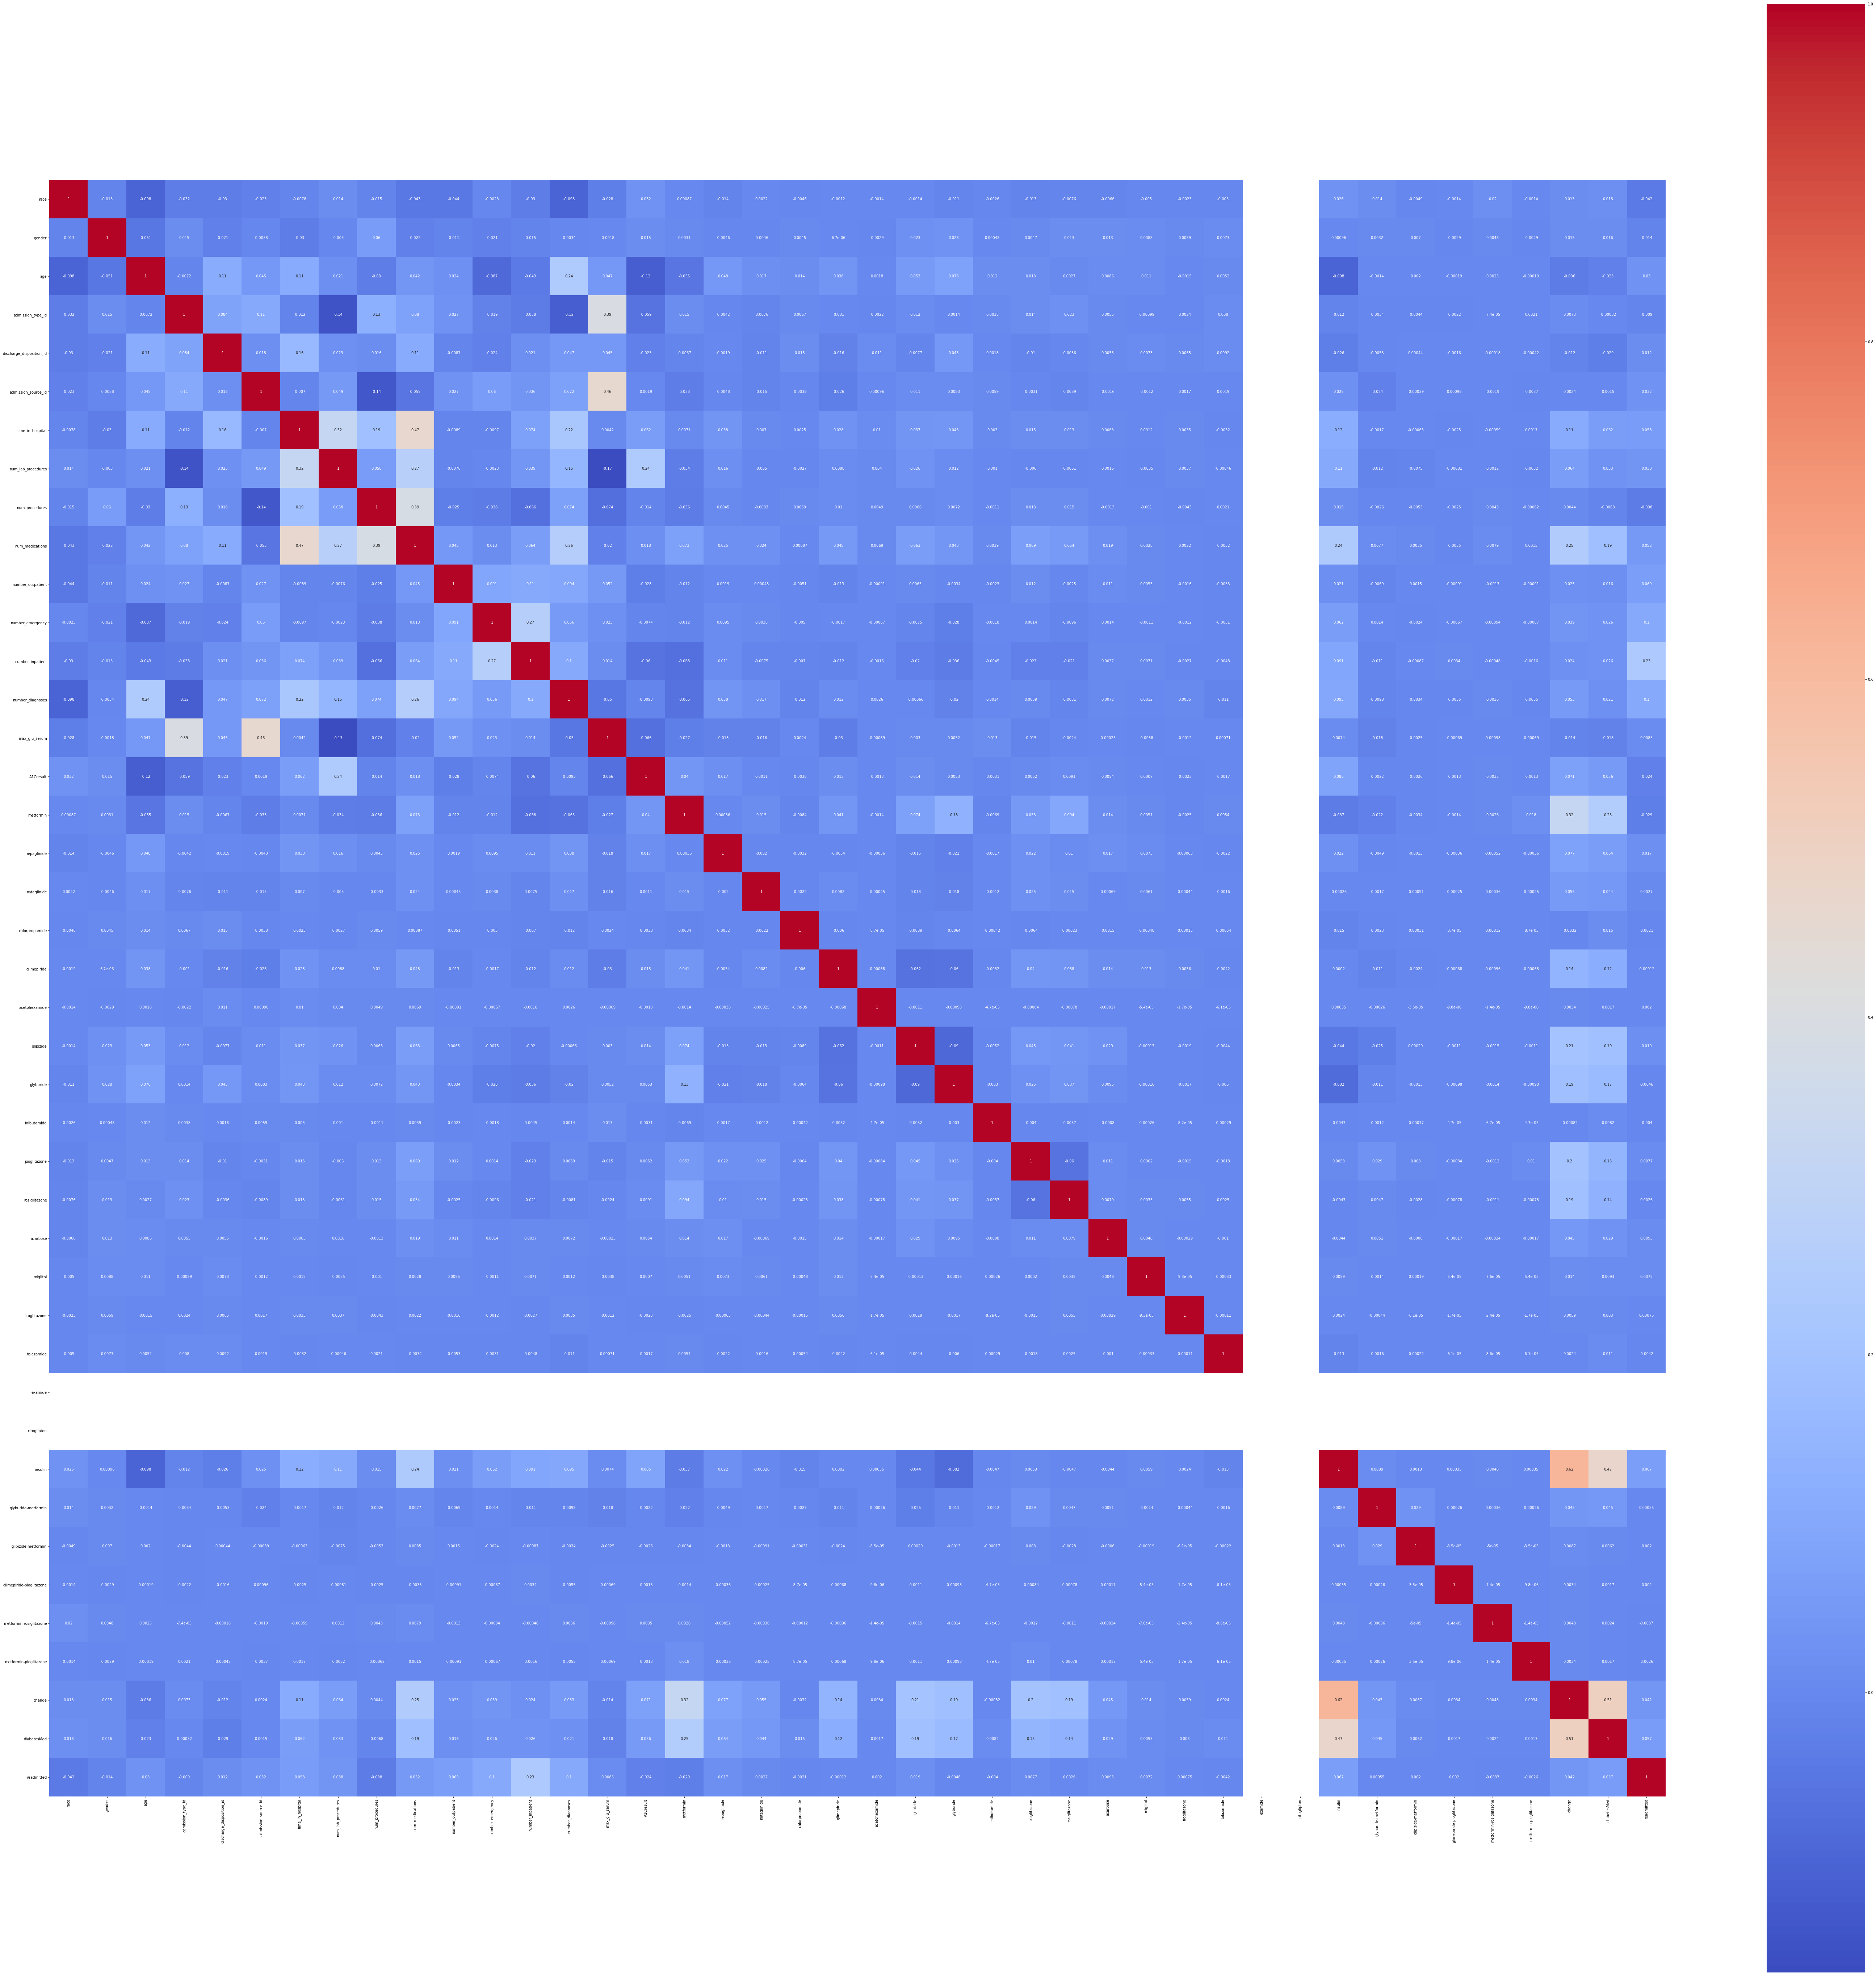

In [73]:
dataset = dataset[['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']]

plt.figure(figsize=(100,100))
sns.heatmap(dataset.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [75]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='gpu_hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(x,y)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=  46.2s
[11:55:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7; total time= 1.1min
[11:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7; total time= 1.3min
[11:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7; total time= 1.3min
[11:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7; total time= 1.4min
[12:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=  28.8s
[12:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=  27.8s
[12:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=  28.6s
[12:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=  27.6s
[12:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=  28.4s
[12:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=  24.1s
[12:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=  22.9s
[12:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=  23.5s
[12:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=  23.5s
[12:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=  23.6s
[12:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1; total time=  50.5s
[12:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1; total time=  50.5s
[12:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1; total time=  51.0s
[12:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1; total time=  50.6s
[12:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1; total time=  51.6s
[12:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=  21.7s
[12:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=  22.1s
[12:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=  21.8s
[12:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warn

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=  21.5s
[12:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(
C:\Users\Acer\a

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=  21.8s
[12:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [76]:
# best parameters
clf.best_params_

{'min_child_weight': 7,
 'max_depth': 12,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [77]:
# getting the model with the best parameters
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

[12:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(101757, 41)


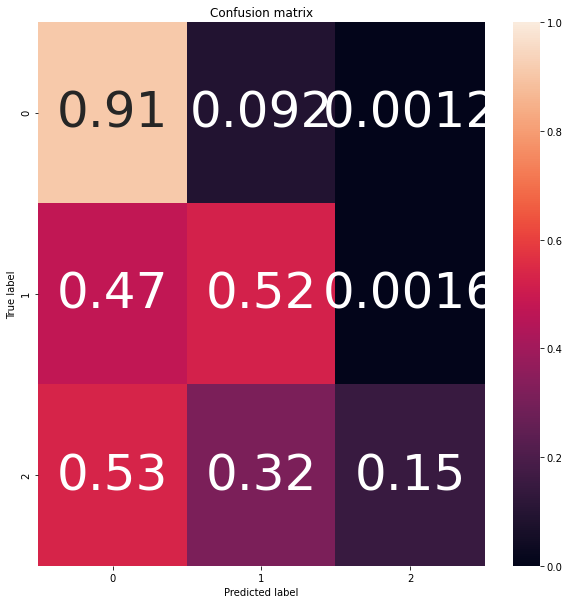

In [78]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(x,y)

pred_xgboost = final_model.predict(x)

print(x.shape)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_norm, classes=rfcl.classes_)

In [79]:
y.shape

(101757,)

Classification accuracy on test set with max features = 1 and max_depth = None: accuracy 0.576
Classification accuracy on test set with max features = 1 and max_depth = 2: accuracy 0.540
Classification accuracy on test set with max features = 1 and max_depth = 3: accuracy 0.540
Classification accuracy on test set with max features = 1 and max_depth = 4: accuracy 0.540
Classification accuracy on test set with max features = 1 and max_depth = 5: accuracy 0.540
Classification accuracy on test set with max features = sqrt and max_depth = None: accuracy 0.581
Classification accuracy on test set with max features = sqrt and max_depth = 2: accuracy 0.544
Classification accuracy on test set with max features = sqrt and max_depth = 3: accuracy 0.551
Classification accuracy on test set with max features = sqrt and max_depth = 4: accuracy 0.562
Classification accuracy on test set with max features = sqrt and max_depth = 5: accuracy 0.567
Classification accuracy on test set with max features = log

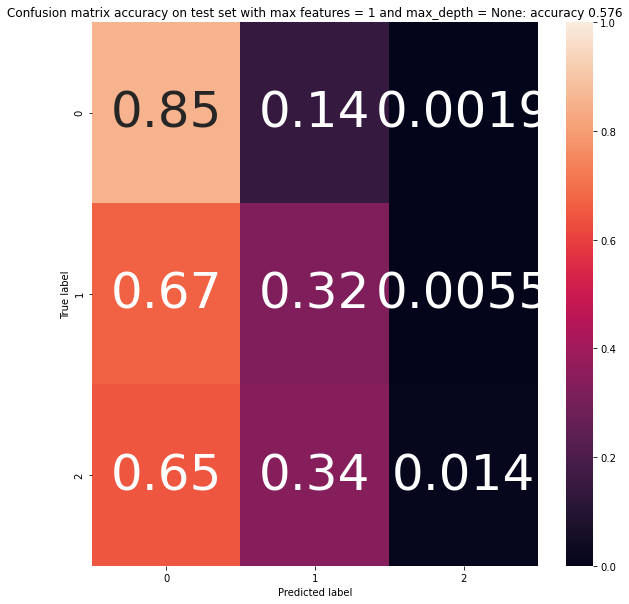

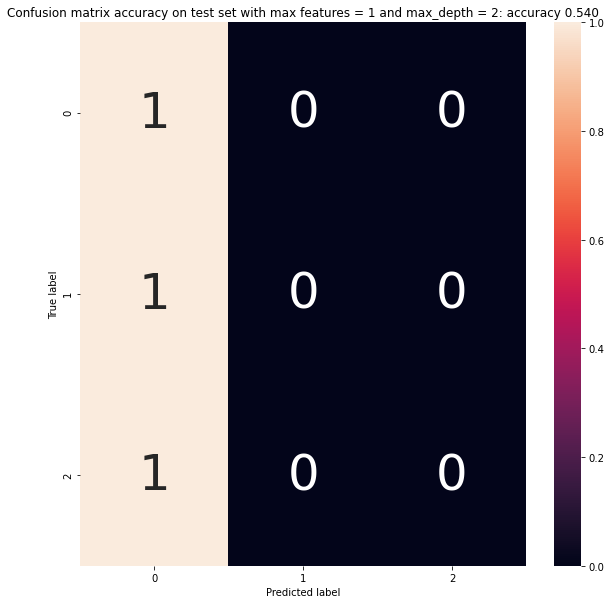

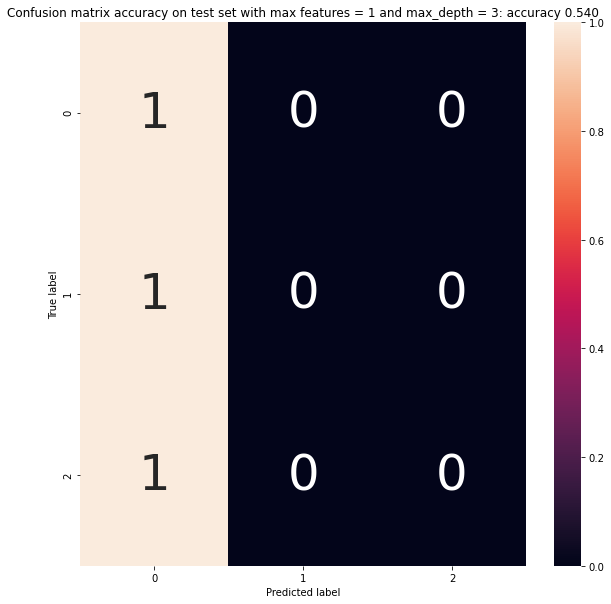

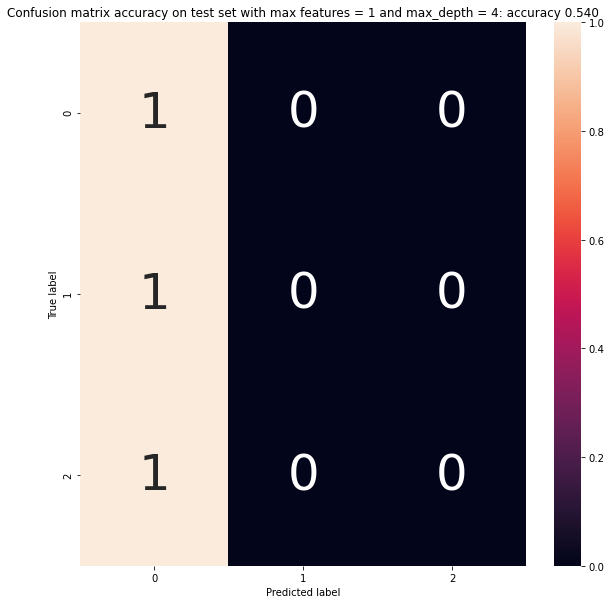

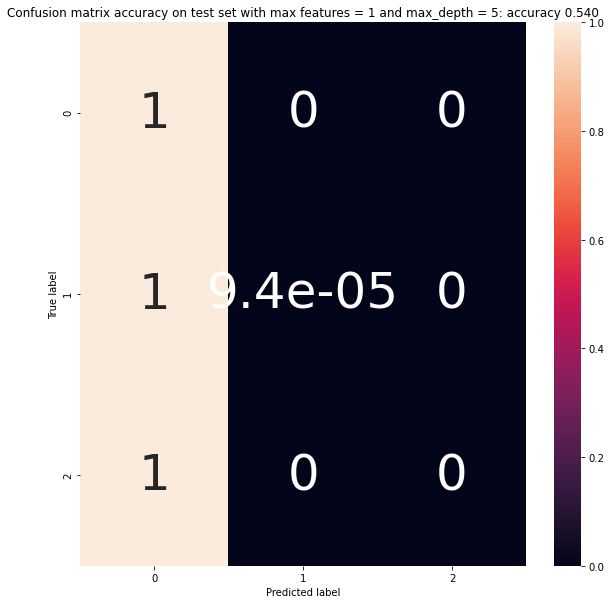

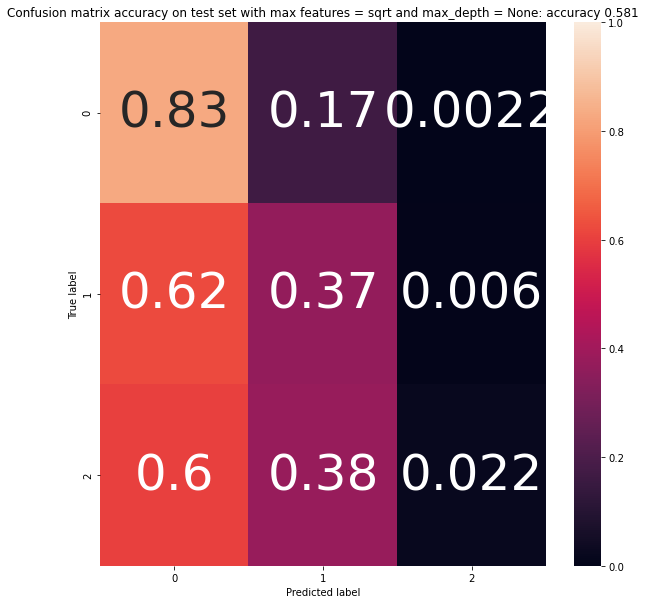

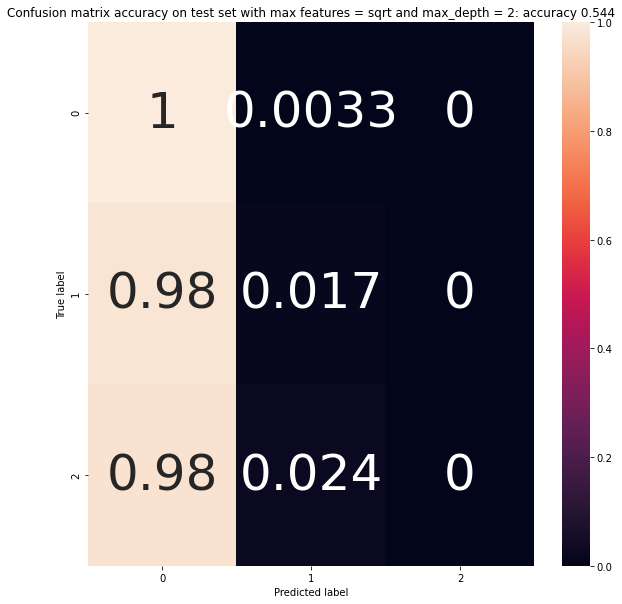

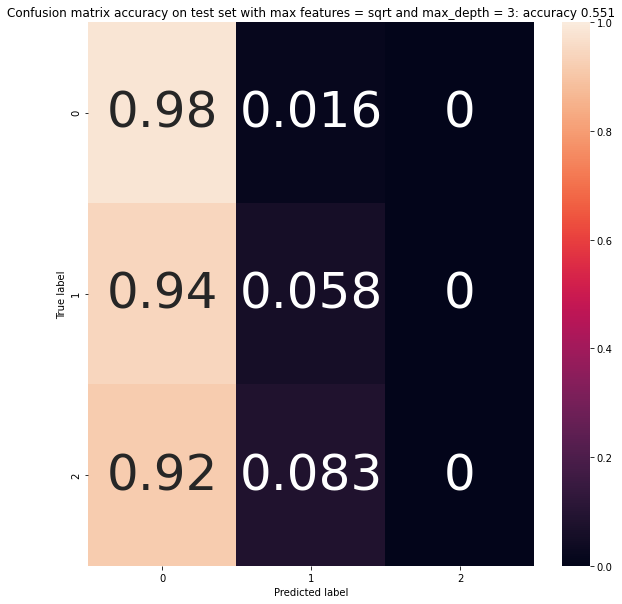

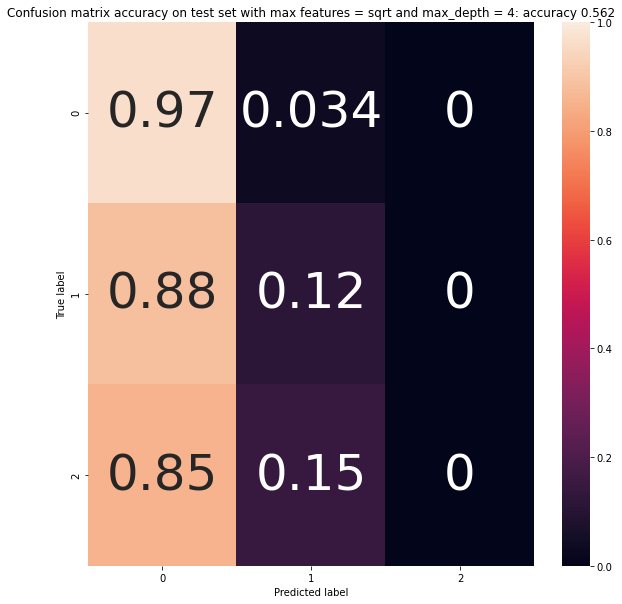

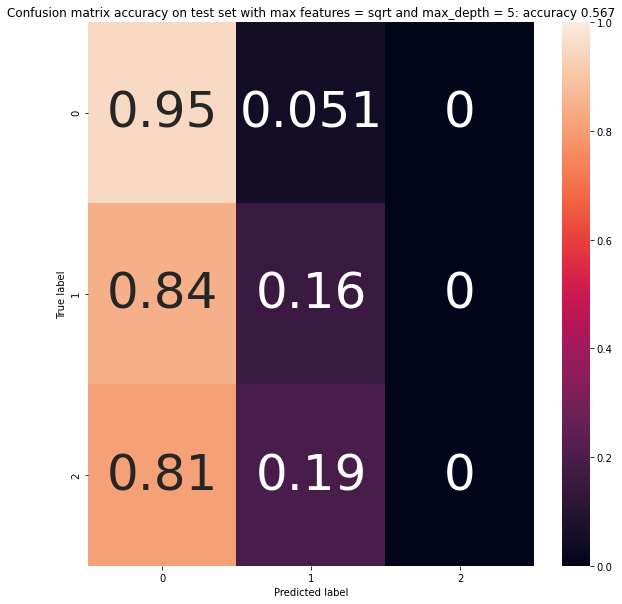

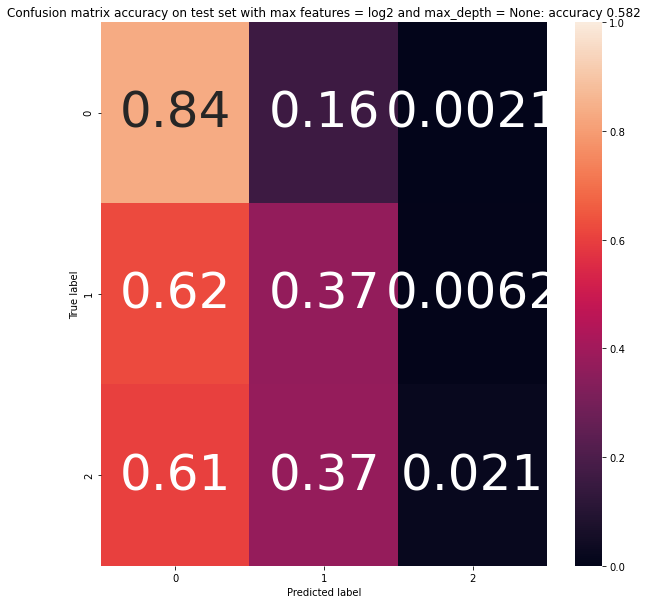

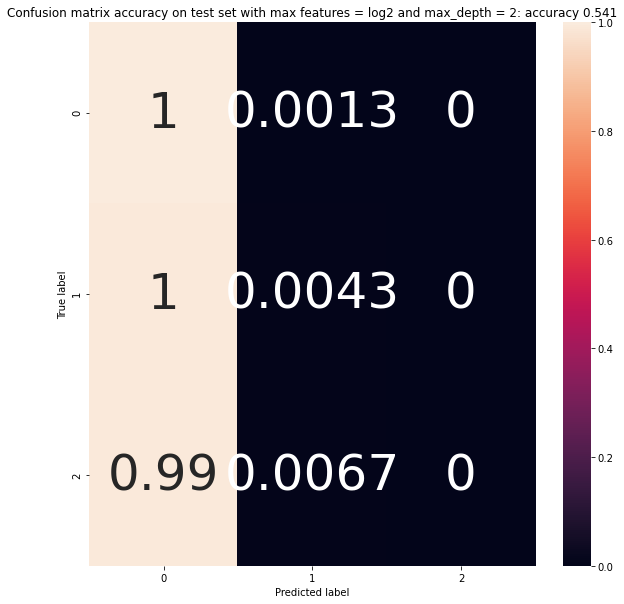

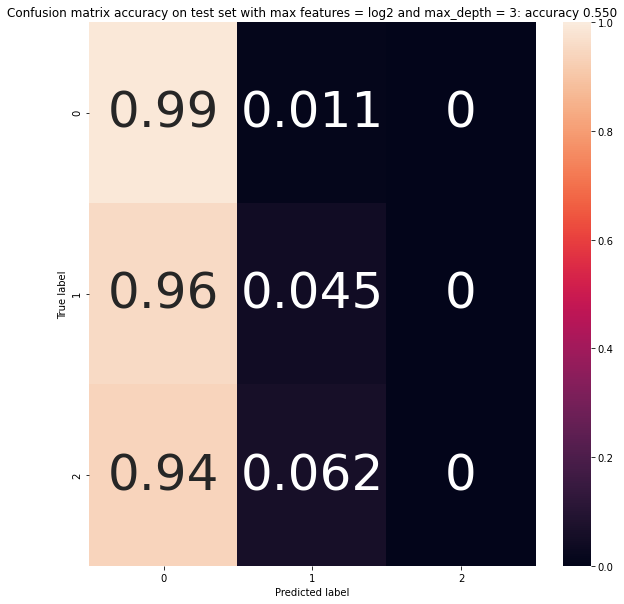

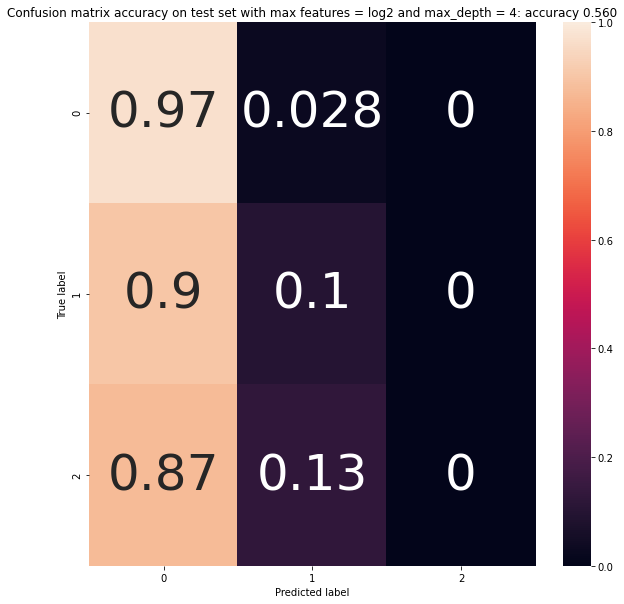

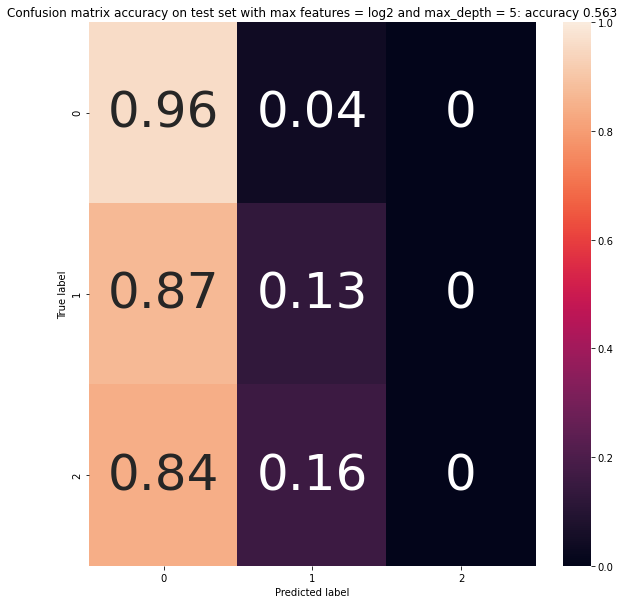

In [93]:
# Tunning Random Forest

from itertools import product
n_estimators = 400
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rfcl = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rfcl.fit(x_train, y_train)
    prediction_test = rfcl.predict(x_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: accuracy {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plot_confusion_matrix(cm_norm, classes=rfcl.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: accuracy {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [81]:
#del final_fi

# Calculating FI
for i, column in enumerate(dataset.drop('readmitted', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, rfcl.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [rfcl.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# # Ordering the data
# final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
# final_fi

Importance of feature race:, 0.014
Importance of feature gender:, 0.001
Importance of feature age:, 0.018
Importance of feature admission_type_id:, 0.012
Importance of feature discharge_disposition_id:, 0.101
Importance of feature admission_source_id:, 0.048
Importance of feature time_in_hospital:, 0.017
Importance of feature num_lab_procedures:, 0.013
Importance of feature num_procedures:, 0.014
Importance of feature num_medications:, 0.042
Importance of feature number_outpatient:, 0.093
Importance of feature number_emergency:, 0.118
Importance of feature number_inpatient:, 0.362
Importance of feature number_diagnoses:, 0.079
Importance of feature max_glu_serum:, 0.003
Importance of feature A1Cresult:, 0.004
Importance of feature metformin:, 0.004
Importance of feature repaglinide:, 0.001
Importance of feature nateglinide:, 0.000
Importance of feature chlorpropamide:, 0.000
Importance of feature glimepiride:, 0.001
Importance of feature acetohexamide:, 0.000
Importance of feature glip

In [82]:
dataset = dataset.drop(['repaglinide','nateglinide','chlorpropamide','acetohexamide','tolbutamide','miglitol','troglitazone',
'tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
'metformin-rosiglitazone','metformin-pioglitazone'],axis=1)

In [84]:
dataset.shape

(101757, 27)

In [85]:
accuracy_score(y_test,y_pred)

0.5755372117400419

In [86]:
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [90]:
rfcl = RandomForestClassifier(n_estimators = 100, min_samples_split = 10,
min_samples_leaf = 4, max_features = 'auto',
max_depth = 70, bootstrap = True)

rfcl.fit(x_train, y_train)
prediction_test = rfcl.predict(x_test)

In [91]:
y_pred=rfcl.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred)

0.5842832809224319